## EDA of Dwelling Time and Region Activity Over Time


### Imports and data cleaning

In [1]:
import pandas as pd
import glob
import os
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import seaborn as sns
import numpy as np
import matplotlib.lines as mlines


In [2]:
#for each subject create a time series
csv_folder = "../../data.nosync/stats"
sub_folders = ["ABIDEI_17","ABIDEII_17","ADHD200_17"]
# Collect all .tsv files
csv_files = []
for folder in sub_folders:
    csv_files = csv_files + glob.glob(os.path.join(os.path.join(csv_folder,folder), "*.csv"))
print(f"There are {len(csv_files)} files")

csv_files.sort()

There are 663 files


### One Participant's Data

#### Plots of region activation over time for one participant

                                              Subject      10th      25th  \
0   sub-29196_ses-1_task-rest_run-1_space-MNI152NL... -1.209594 -0.623648   
1   sub-29195_ses-1_task-rest_run-1_space-MNI152NL... -1.200006 -0.612351   
2   sub-29177_ses-1_task-rest_run-1_space-MNI152NL... -1.241777 -0.643080   
3   sub-29178_ses-1_task-rest_run-1_space-MNI152NL... -1.208132 -0.612543   
4   sub-29187_ses-1_task-rest_run-1_space-MNI152NL... -1.217136 -0.621160   
..                                                ...       ...       ...   
72  sub-29211_ses-1_task-rest_run-1_space-MNI152NL... -1.236302 -0.636914   
73  sub-29230_ses-1_task-rest_run-1_space-MNI152NL... -1.224315 -0.618172   
74  sub-29239_ses-1_task-rest_run-1_space-MNI152NL... -1.215656 -0.623453   
75  sub-29248_ses-1_task-rest_run-1_space-MNI152NL... -1.217285 -0.619433   
76  sub-29212_ses-1_task-rest_run-1_space-MNI152NL... -1.245194 -0.640385   

        50th      75th      90th  
0  -0.003031  0.620691  1.211124  
1  -0

/var/folders/3x/f23r8c8x5932jcwnsq0s16jwgnr8g1/T/ipykernel_19506/367651452.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

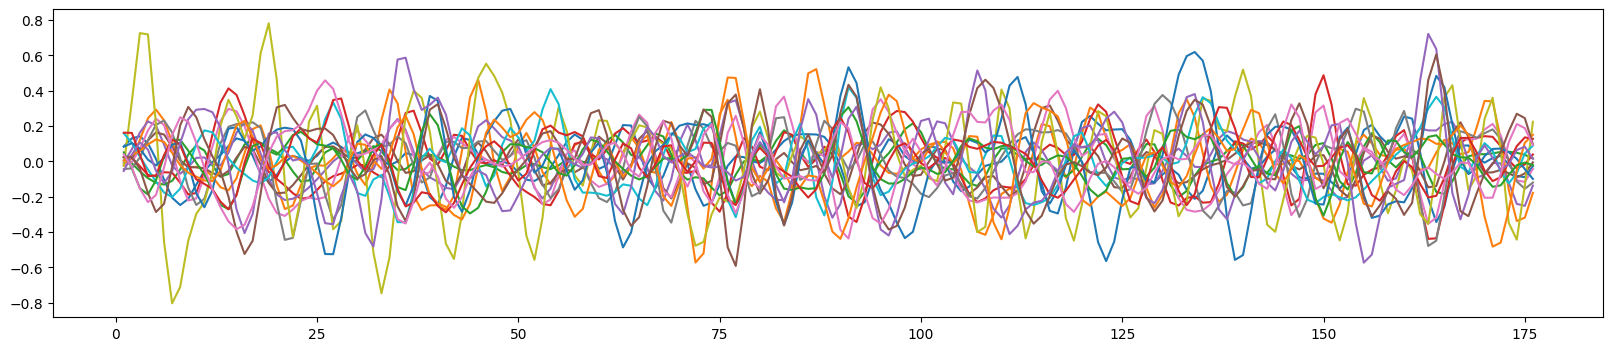

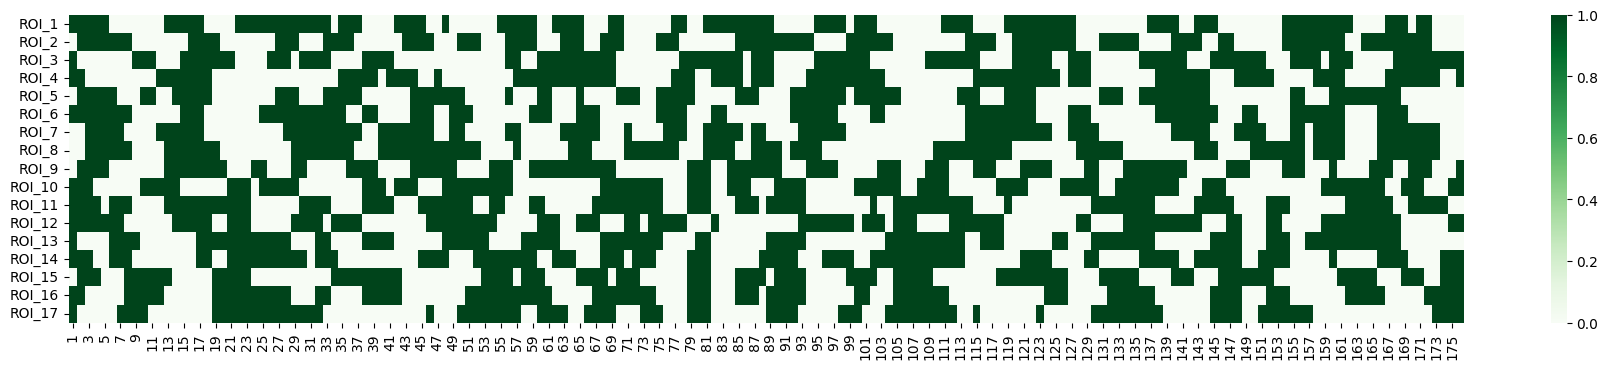

In [3]:
# plot of region activity over time, and heatmap of if a region is more or less active than average over time

thresholds = pd.read_csv(csv_files[0],index_col= 0, delimiter=";")

scan = csv_files[1]
scan_id = os.path.split(scan)[1].replace("_ses-1_task-rest","").replace("_space-MNI152NLin6ASym_desc-preproc_b.csv","")
scan_thresholds_subject = os.path.split(scan)[1].replace(".csv","old")
subject = scan_id.replace("sub-","").replace("_run-1","").replace("_run-2","")
dataset = os.path.split(scan)[0].replace("../../data.nosync/stats/","")

print(thresholds)
print(scan_thresholds_subject)

scan_thresholds = thresholds[thresholds["Subject"]==scan_thresholds_subject]
scan_df = pd.read_csv(scan,delimiter = ";",index_col = 0)

fig,ax = plt.subplots(figsize= (20,4))
for roi in scan_df.columns:
    ax.plot(scan_df[roi])
fig.show()
oi_scan_df = scan_df>=scan_thresholds["50th"].values[0]

fig,ax = plt.subplots(figsize= (22.5,4))

sns.heatmap(oi_scan_df.T,cmap="Greens")


#### Average Time Active plots for one participant
For each region how many time steps is it active for when active (Dwelling time)

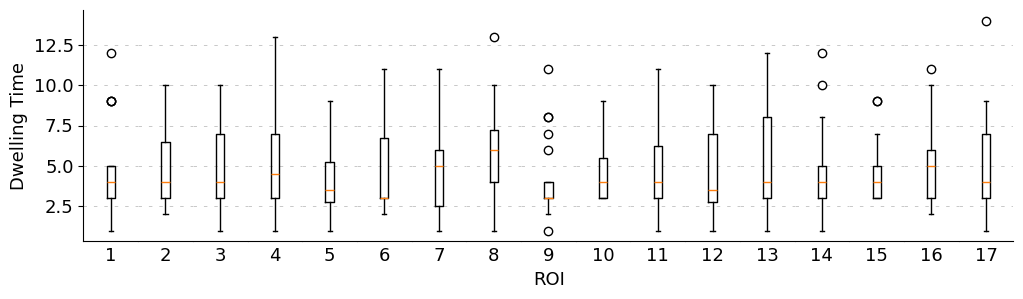

In [4]:
# distribution of region dwelling times
plt.rcParams.update({'font.size': 13})

region_times = {i:list() for i in oi_scan_df.columns}
fig,ax = plt.subplots(1,17,figsize = (12,3),sharey=True,)

for x,region in enumerate(oi_scan_df.columns):
    counter = 0
    for timestep in oi_scan_df[region]:
        if timestep:
            counter+=1
        else:
            if counter!=0:
                region_times[region].append(counter)
            counter = 0
    ax[x].boxplot(region_times[region])

    ax[x].set_xlabel(x+1)
    ax[x].set_xticks([])
    ax[x].spines['top'].set_visible(False)
    ax[x].spines['right'].set_visible(False)
    if x!=0:
        ax[x].tick_params(left=False, labelleft=False) 
        ax[x].spines['left'].set_visible(False)
    ax[x].grid(color = 'black',linestyle=(0, (5, 10)), linewidth = 0.5,visible= True,alpha=0.3)
ax[0].set_ylabel("Dwelling Time")

fig.text(0.5, 0.01, 'ROI', va='top', rotation='horizontal')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)
plt.savefig("../pics/TimeActive.svg", bbox_inches="tight")
plt.show()



A closer look at the cwelling times

In [5]:
for i,u in region_times.items():
    print(i,u)

ROI_1 [5, 5, 12, 3, 4, 1, 5, 4, 2, 2, 9, 4, 3, 4, 9, 4, 3, 9, 3, 2]
ROI_2 [7, 4, 3, 4, 4, 3, 4, 3, 3, 3, 10, 6, 4, 8, 5, 4, 2, 8, 9]
ROI_3 [1, 3, 7, 3, 4, 4, 2, 10, 8, 3, 7, 7, 5, 3, 6, 7, 4, 3]
ROI_4 [2, 7, 5, 4, 1, 13, 3, 4, 3, 10, 11, 3, 7, 5, 4, 7]
ROI_5 [5, 2, 5, 3, 5, 7, 1, 2, 1, 3, 5, 3, 7, 6, 3, 4, 3, 9, 2, 9]
ROI_6 [8, 3, 11, 2, 3, 3, 3, 3, 4, 2, 6, 2, 9, 3, 8, 2, 7, 4]
ROI_7 [5, 6, 10, 7, 2, 2, 5, 1, 3, 5, 2, 6, 11, 4, 5, 4, 2, 4, 8]
ROI_8 [6, 7, 8, 13, 1, 3, 7, 4, 4, 4, 10, 6, 3, 7, 4, 8]
ROI_9 [4, 8, 2, 2, 4, 6, 3, 11, 3, 7, 4, 3, 3, 3, 4, 2, 8, 3, 3, 1, 3, 3]
ROI_10 [3, 5, 3, 5, 3, 3, 9, 8, 3, 3, 4, 6, 4, 4, 5, 8, 3, 8, 3]
ROI_11 [4, 3, 11, 4, 4, 7, 2, 2, 9, 3, 3, 5, 1, 10, 1, 8, 5, 3, 6, 5]
ROI_12 [7, 5, 3, 4, 4, 9, 3, 3, 2, 5, 1, 7, 3, 3, 7, 2, 10, 2, 2, 10]
ROI_13 [1, 4, 12, 2, 4, 6, 5, 8, 2, 5, 10, 3, 2, 8, 4, 3, 12]
ROI_14 [3, 3, 2, 10, 3, 4, 8, 3, 3, 3, 3, 5, 4, 12, 4, 2, 5, 6, 4, 1, 4]
ROI_15 [3, 6, 5, 9, 4, 3, 4, 3, 3, 4, 4, 4, 5, 9, 5, 3, 7, 5, 3]
ROI_16 [2, 5, 10

Average dwelling times

<BarContainer object of 17 artists>

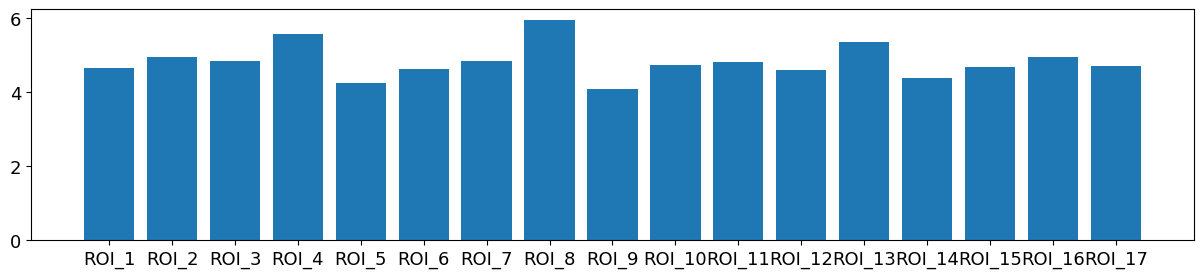

In [6]:
fig,ax = plt.subplots(1,1,figsize = (15,3))

region_av_times = [[key,np.mean(value),np.var(value)] for key,value in region_times.items()]
region_av_times = pd.DataFrame(region_av_times,columns=["ROI","Mean","Var"])
plt.bar(region_av_times["ROI"],region_av_times["Mean"])

Variance in Dwelling Time

<BarContainer object of 17 artists>

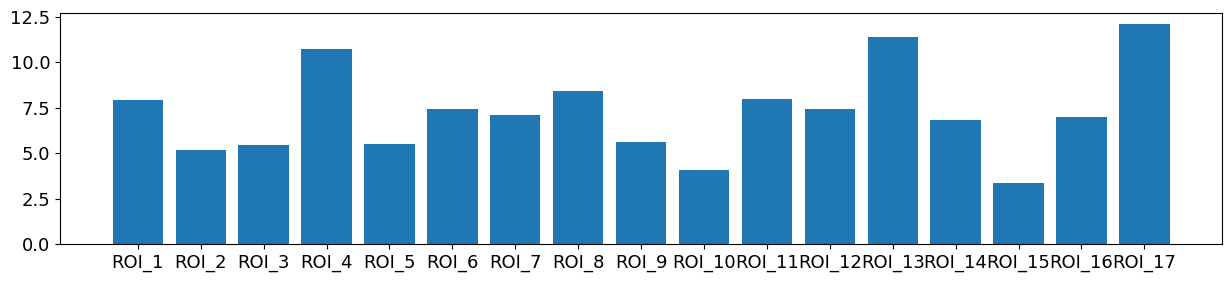

In [7]:
fig,ax = plt.subplots(1,1,figsize = (15,3))
plt.bar(region_av_times["ROI"],region_av_times["Var"])

### Aggregated for all participants

Calculate Aggregated Dwelling Times

In [8]:
thresholds = pd.read_csv(csv_files[0],index_col= 0, delimiter=";")
all_scan_dfs = []
for scan in tqdm(csv_files[1:]):
    if "thresholds" in scan:
        print("Switching to other thresholds file")
        thresholds = pd.read_csv(scan,index_col= 0, delimiter=";")
        pass
    scan_id = os.path.split(scan)[1].replace("_ses-1_task-rest","").replace("_space-MNI152NLin6ASym_desc-preproc_b.csv","")
    scan_thresholds_subject = os.path.split(scan)[1].replace(".csv","old")
    subject = scan_id.replace("sub-","").replace("_run-1","").replace("_run-2","")
    dataset_r = os.path.split(scan)[0].replace("../../data.nosync/stats/","")
    dataset = dataset_r.strip("_7").strip("_17")
    scan_thresholds = thresholds[thresholds["Subject"]==scan_thresholds_subject]
    scan_df = pd.read_csv(scan,delimiter = ";",index_col = 0)
    try:
        oi_scan_df = scan_df>=scan_thresholds["50th"].values[0]
        all_scan_dfs.append([subject,oi_scan_df,dataset,dataset_r])

    except:
        print(subject, "not in thresholds, not able to binarise")


len(all_scan_dfs)
all_scan_dfs = pd.DataFrame(all_scan_dfs, columns= ["Participant","Binarised","Dataset","Dataset_r"])
all_scan_dfs["Participant"] = all_scan_dfs["Participant"].astype(int)
all_scan_dfs

 25%|██▌       | 166/662 [00:00<00:00, 768.00it/s]

Switching to other thresholds file
ABIDEI_17_activation_thresholds.csv not in thresholds, not able to binarise


 48%|████▊     | 319/662 [00:00<00:00, 729.00it/s]

Switching to other thresholds file
ADHD200_17_activation_thresholds.csv not in thresholds, not able to binarise


100%|██████████| 662/662 [00:00<00:00, 699.51it/s]


,Participant,Binarised,Dataset,Dataset_r
0,29177,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEII,ABIDEII_17
1,29178,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEII,ABIDEII_17
2,29179,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEII,ABIDEII_17
3,29180,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEII,ABIDEII_17
4,29181,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEII,ABIDEII_17
...,...,...,...,...
655,9578663,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ADHD200,ADHD200_17
656,9750701,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ADHD200,ADHD200_17
657,9750701,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ADHD200,ADHD200_17
658,9907452,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ADHD200,ADHD200_17


In [9]:
#time active
def get_region_times(oi_scan_df):
    region_times = {i:list() for i in oi_scan_df.columns}
    for region in oi_scan_df.columns:
        counter = 0
        for timestep in oi_scan_df[region]:
            if timestep:
                counter+=1
            else:
                if counter!=0:
                    region_times[region].append(counter)
                counter = 0
    return region_times

all_region_times = []
for i in range(all_scan_dfs.shape[0]):
    all_region_times.append(get_region_times(all_scan_dfs.iloc[i]["Binarised"]))

all_scan_dfs["Region Dwell"] = all_region_times

def to_summary(row):
        return pd.DataFrame([[key,np.mean(value),np.var(value)] for key,value in row.items()],columns=["ROI","Mean","Var"])
all_scan_dfs["Region Dwell Summary"] = all_scan_dfs["Region Dwell"].apply(to_summary)

In [10]:
# join with diagnostic data and clean diagnostic data
meta_df = pd.read_csv("../../data.nosync/phenotypic/meta_data.csv",index_col=0)
meta_df["Detailed_Label"] = meta_df["Co-Diagnosis"].fillna("Pure") + "+" + meta_df["Diagnosis"]
meta_df = meta_df.convert_dtypes()
meta_df["Detailed_Label"] = meta_df["Detailed_Label"].replace("ADHD/+ASD","ASD+ADHD",regex=True)
meta_df["Label"] = meta_df["Detailed_Label"].replace("Pure/+","",regex=True).replace("Other/+","",regex=True)

all_scan_meta = pd.merge(meta_df,all_scan_dfs,left_on=["Sub ID","Dataset"], right_on= ["Participant","Dataset"],how="right",validate="1:m")
scans_df = pd.DataFrame(all_scan_meta.groupby(["Participant","Dataset"]).size(),columns=["Scans"])
all_scan_meta = pd.merge(all_scan_meta,scans_df, on=["Participant","Dataset"], how="left",validate="m:1")
all_scan_meta.head(3)

,Sub ID,Age,Sex,IQ,Diagnosis,Co-Diagnosis,Dataset,Detailed_Label,Label,Participant,Binarised,Dataset_r,Region Dwell,Region Dwell Summary,Scans
0,29177,10.0,Female,74,ASD,ADHD,ABIDEII,ADHD+ASD,ADHD+ASD,29177,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEII_17,"{'ROI_1': [5, 5, 12, 3, 4, 1, 5, 4, 2, 2, 9, 4...",ROI Mean Var 0 ROI_1 4....,1
1,29178,13.63,Male,100,ASD,<NA>,ABIDEII,Pure+ASD,Pure+ASD,29178,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEII_17,"{'ROI_1': [5, 6, 6, 4, 1, 4, 5, 4, 4, 4, 5, 7,...",ROI Mean Var 0 ROI_1 4....,1
2,29179,7.25,Male,89,ASD,<NA>,ABIDEII,Pure+ASD,Pure+ASD,29179,ROI_1 ROI_2 ROI_3 ROI_4 ROI_5 ROI_6 ...,ABIDEII_17,"{'ROI_1': [3, 6, 3, 3, 2, 9, 3, 14, 4, 1, 2, 9...",ROI Mean Var 0 ROI_1 4....,1


#### distribution of all region data by label

Tried Box plots, these show very little difference between regions

100%|██████████| 7/7 [00:00<00:00, 362.81it/s]


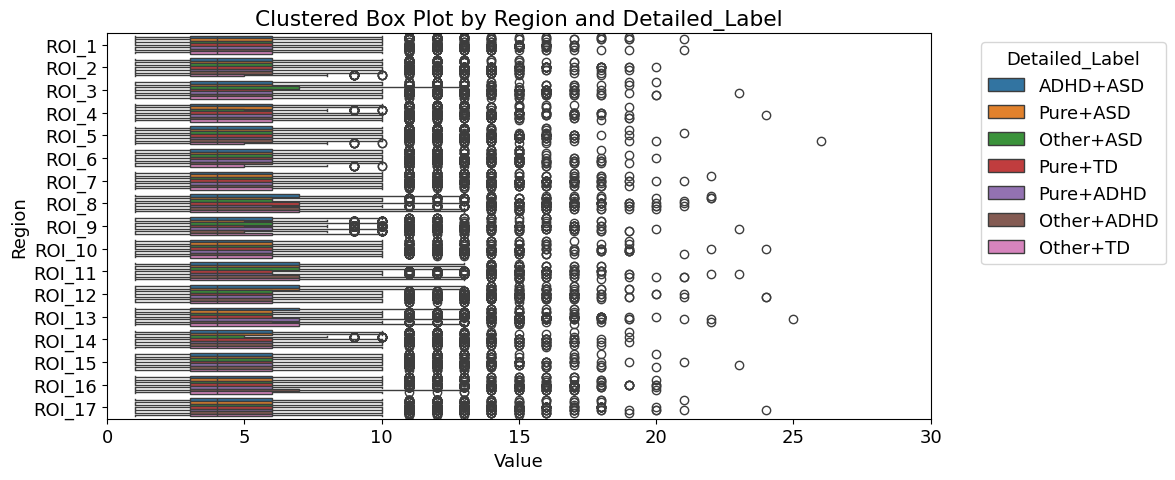

In [11]:
by = "Label"
# collect all region-time data in a list of dicts
long_data = []

for dataset in tqdm(all_scan_meta[by].unique()):
    cat_df = all_scan_meta[all_scan_meta[by] == dataset]
    
    # Flatten and append to long_data
    for row in cat_df["Region Dwell"]:
        for region, values in row.items():
            for v in values:
                long_data.append({
                    "Region": region,
                    "Value": v,
                    "Detailed_Label": dataset
                })

# Convert to DataFrame
df_long = pd.DataFrame(long_data)
# Plot
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_long, y="Region", x="Value", hue="Detailed_Label",orient='h')
plt.xlim(0, 30)
plt.title("Clustered Box Plot by Region and Detailed_Label")
plt.legend(title="Detailed_Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Kernel Density Estimate Plots show more of the differences but these are still small 

['ADHD+ASD' 'Pure+ASD' 'Other+ASD' 'Pure+TD' 'Pure+ADHD' 'Other+ADHD'
 'Other+TD']


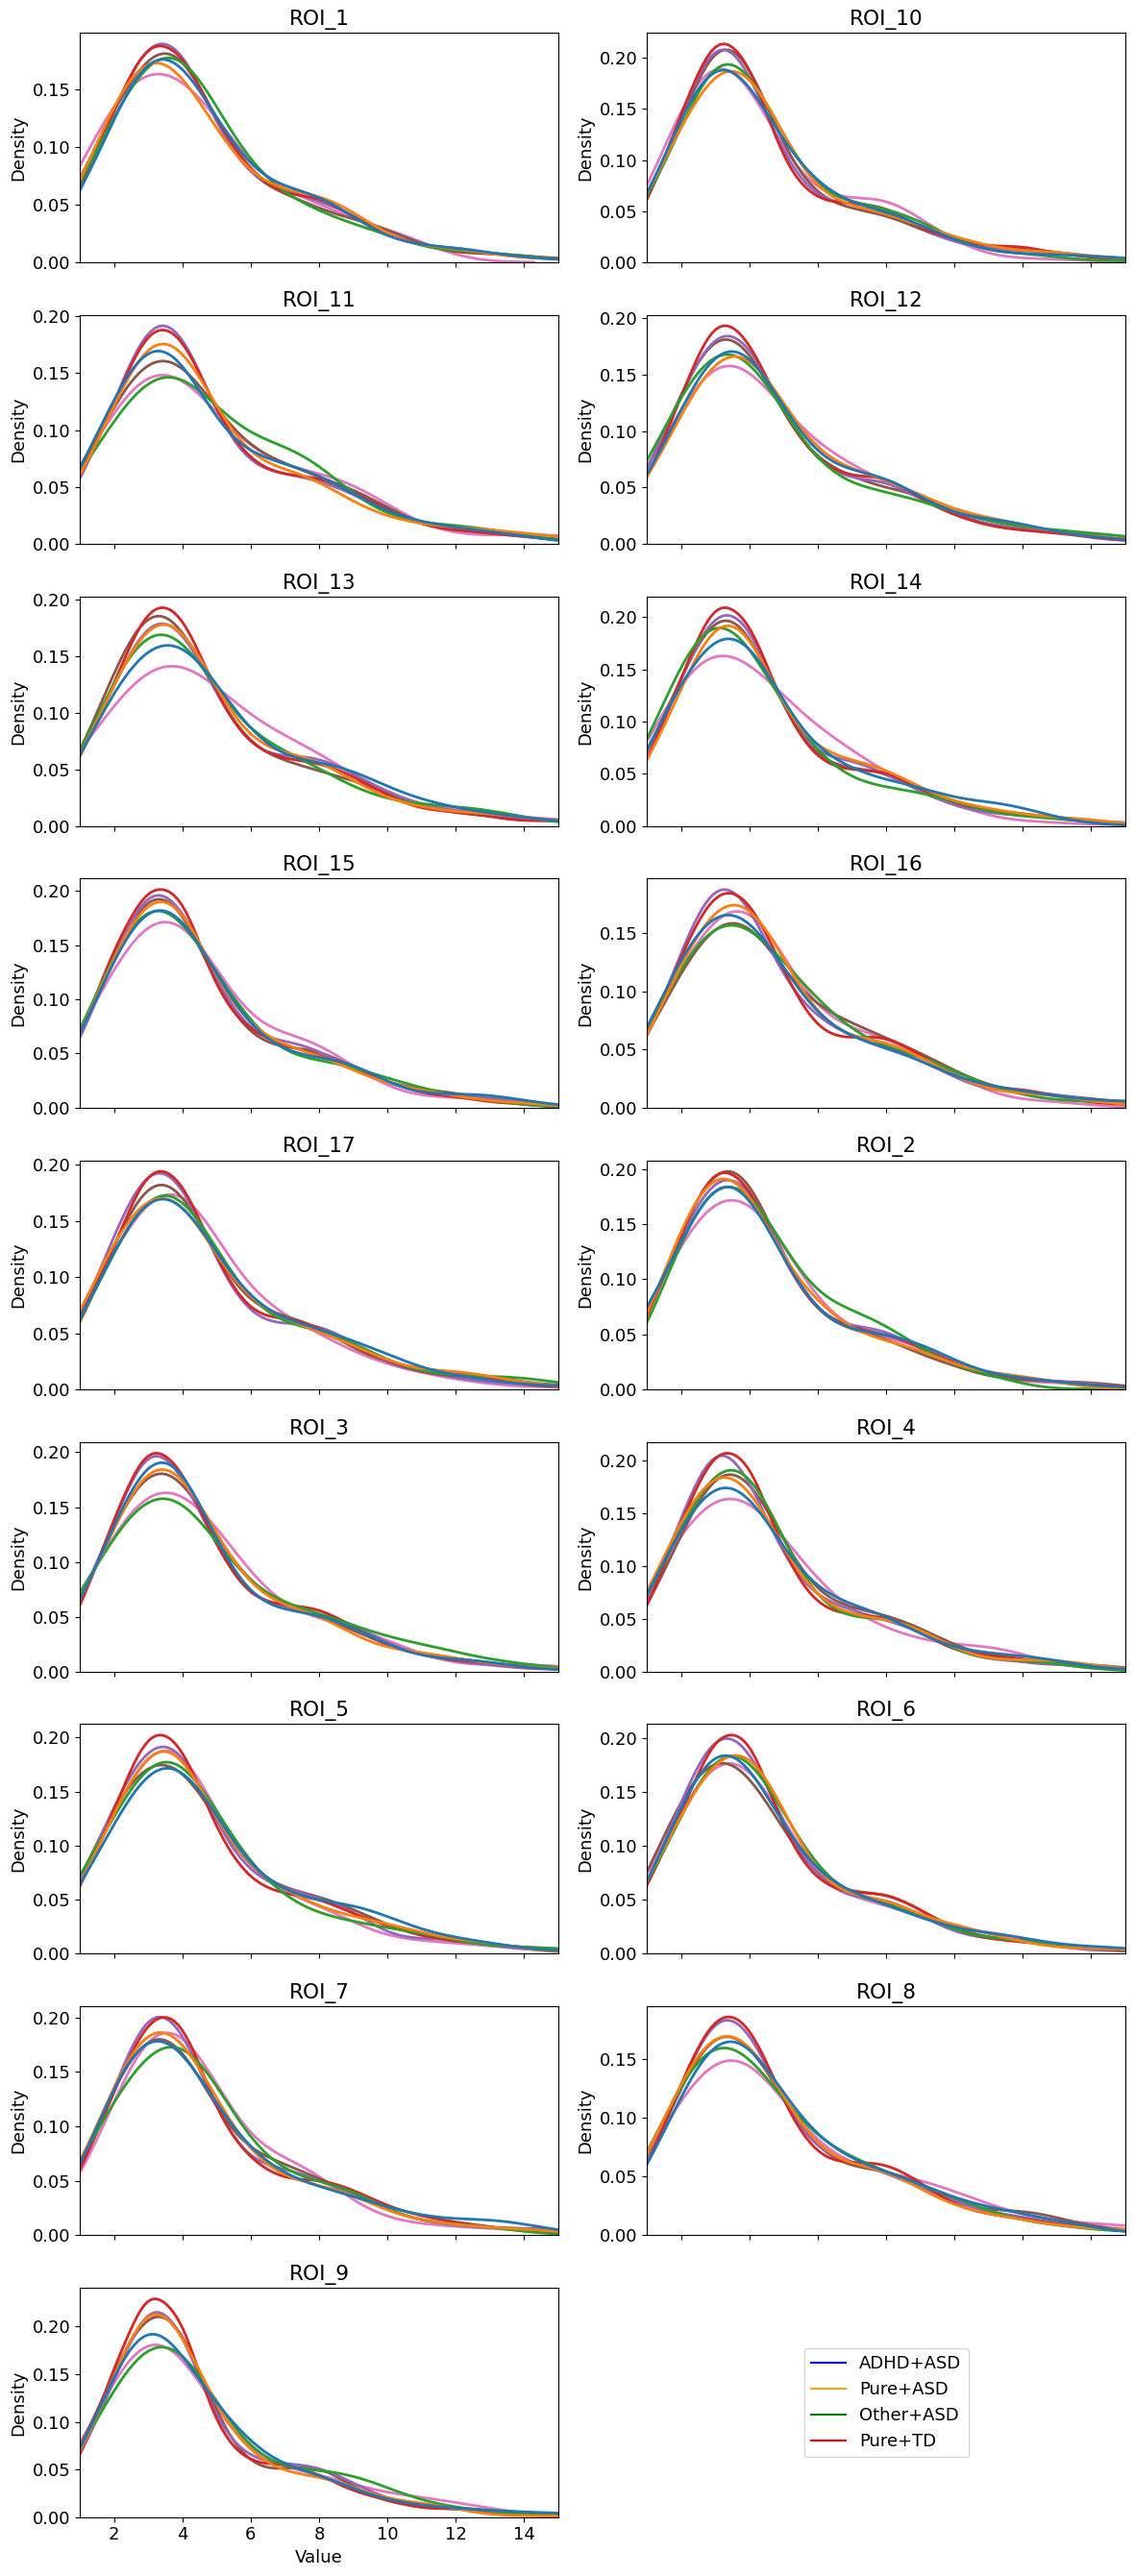

In [12]:

regions = sorted(df_long["Region"].unique())
n_regions = len(regions)

ncols = 2
nrows = int(np.ceil(n_regions / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 3), sharex=True)
axes = axes.flatten()

# For storing handles/labels from the first plot
legend_handles = None
legend_labels = None
for i, region in enumerate(regions):
    ax = axes[i]
    subset = df_long[df_long["Region"] == region]

    # For the first plot, allow legend temporarily to get handles and labels
    plot = sns.kdeplot(
        data=subset,
        x="Value",
        hue="Detailed_Label",
        ax=ax,
        common_norm=False,
        fill=False,
        linewidth=2,
        bw_adjust=1.3,
        clip=(1, None),
        legend=False # legend only on first plot
    )

    ax.set_title(region)
    ax.set_xlim(1, 15)


# Put legend on the first unused subplot (if any)
if len(regions) < len(axes):
    legend_ax = axes[len(regions)]
    legend_ax.axis("off")  # Hide axes
    handles = []
    categories = df_long.Detailed_Label.unique()
    print(categories)
    for x,c in enumerate(["blue","orange","green","red"]):
        handle = mlines.Line2D([], [],color=c, label=categories[x])
        handles.append(handle)
    legend_ax.legend(handles=handles,loc = "center")

# Hide any *remaining* unused axes
for j in range(len(regions) + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### region mean and vars scatters by dataset

Find Means and Variances

In [13]:
by = "Label"
colours = ["Red","Blue","Orange","Grey"]
ages = {i:list() for i in all_scan_meta[by].unique()}

mean_means =[]
for x_d,dataset in enumerate(all_scan_meta[by].unique()):
    cat_df = all_scan_meta[all_scan_meta[by] == dataset].copy()
    regions = list(all_scan_meta["Binarised"][0].columns)
    ROI_dict = {i:list() for i in regions}
    for age in cat_df["Age"]:
        ages[dataset].append(age)
    for row in cat_df["Region Dwell"]:
        for region,values in row.items():
            ROI_dict[region].append(np.mean(values))
            #print(values)
            #print(row)



    for x,region in enumerate(ROI_dict.keys()):
        mean_means.append([dataset,region,np.mean(ROI_dict[region]),np.var(ROI_dict[region])])

mean_means = pd.DataFrame(mean_means)


Plot Means

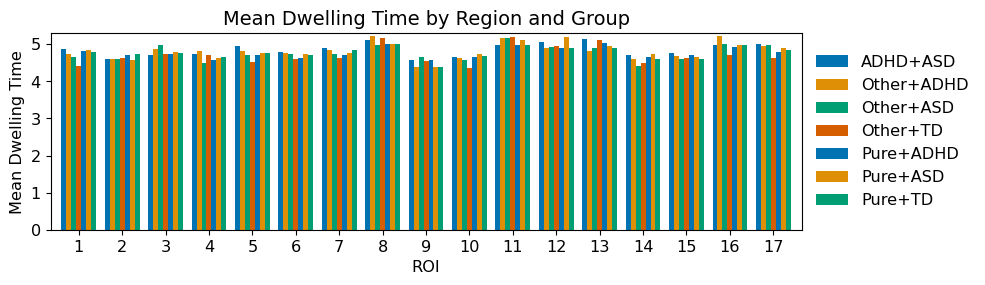

In [14]:
#bigger text for plots that are in report 
plt.rcParams.update({'font.size': 11.6})

mean_means.columns = ['Group', 'Item', 'Mean','Var']

# Pivot the data for clustering
pivot_df = mean_means.pivot(index='Item', columns='Group', values='Mean')
pivot_df = pivot_df.sort_index(key=lambda x: x.str.extract(r'(\d+)').squeeze().astype(int))
# Create plot
colors = sns.color_palette("colorblind", n_colors=4)
pivot_df.plot(kind='bar', figsize=(10, 3), ylim=(0, 5.3),width=0.8,color=colors)
custom_labels = [i+1 for i in range(17)]
plt.xticks(ticks=range(len(pivot_df.index)), labels=custom_labels, rotation=0)
plt.title('Mean Dwelling Time by Region and Group')
plt.ylabel('Mean Dwelling Time',rotation = 90)
plt.xlabel("ROI")
plt.legend( bbox_to_anchor=(1, 0.5), loc='center left',frameon = False)
plt.tight_layout()
plt.savefig("../pics/DwellingTime.svg", bbox_inches="tight")
plt.show()

Plot Variances

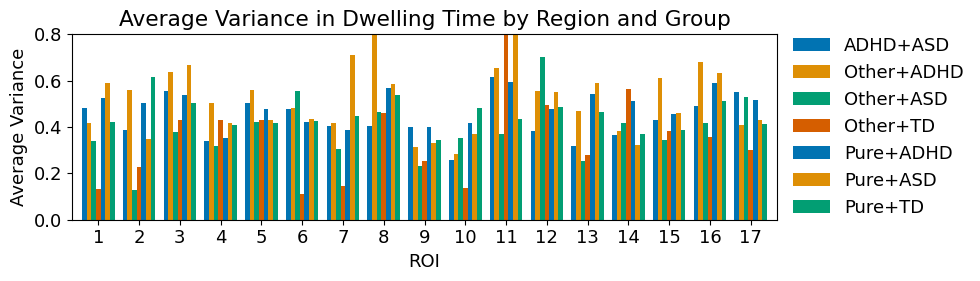

In [15]:
plt.rcParams.update({'font.size': 13})

# Pivot the data for clustering
pivot_df = mean_means.pivot(index='Item', columns='Group', values='Var')
pivot_df = pivot_df.sort_index(key=lambda x: x.str.extract(r'(\d+)').squeeze().astype(int))

# Create plot
colors = sns.color_palette("colorblind", n_colors=4)
pivot_df.plot(kind='bar', figsize=(10, 3), ylim=(0,0.8),width=0.8,color = colors)
custom_labels = [i+1 for i in range(17)]
plt.xticks(ticks=range(len(pivot_df.index)), labels=custom_labels, rotation=0)
plt.title('Average Variance in Dwelling Time by Region and Group')
plt.ylabel('Average Variance')
plt.xlabel('')
plt.legend( bbox_to_anchor=(1, 0.5), loc='center left',frameon = False)
plt.xlabel("ROI")
plt.savefig("../pics/VarDwellingTime.svg", bbox_inches="tight")

plt.tight_layout()
plt.show()

Plot Distribution of Dwelling Times

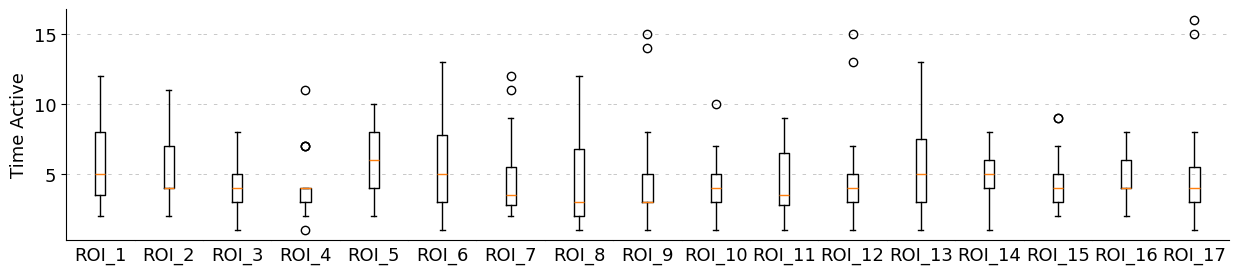

In [16]:
region_times = {i:list() for i in oi_scan_df.columns}
fig,ax = plt.subplots(1,17,figsize = (15,3),sharey=True,)

for x,region in enumerate(oi_scan_df.columns):
    counter = 0
    for timestep in oi_scan_df[region]:
        if timestep:
            counter+=1
        else:
            if counter!=0:
                region_times[region].append(counter)
            counter = 0
    ax[x].boxplot(region_times[region])
    # ax[x].set_ybound(20)
    # ax[x].set_ylim(0)
    ax[x].set_xlabel(region)
    ax[x].set_xticks([])
    ax[x].spines['top'].set_visible(False)
    ax[x].spines['right'].set_visible(False)
    if x!=0:
        #ax[x].set_yticklabels(())
        ax[x].tick_params(left=False, labelleft=False) 
        ax[x].spines['left'].set_visible(False)
    ax[x].grid(color = 'black',linestyle=(0, (5, 10)), linewidth = 0.5,visible= True,alpha=0.3)
ax[0].set_ylabel("Time Active")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)
plt.savefig("../pics/TimeActive.pdf", bbox_inches="tight")
plt.show()